In [64]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [65]:
df = pd.read_csv('../example_data/example_wp_log_peyton_manning.csv')

In [66]:
m = NeuralProphet()
metrics = m.fit(df)
future = m.make_future_dataframe(df, future_periods=365)
forecast = m.predict(future)

Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


In [67]:
# Events

In [68]:
playoffs = pd.DataFrame({
        'event': 'playoff',
        'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                              '2010-01-24', '2010-02-07', '2011-01-08',
                              '2013-01-12', '2014-01-12', '2014-01-19',
                              '2014-02-02', '2015-01-11', '2016-01-17',
                              '2016-01-24', '2016-02-07']),
})

In [69]:
superbowls = pd.DataFrame({'event': 'superbowl',
'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07'])})

In [71]:
events_df = pd.concat((superbowls, playoffs))

In [72]:
m = NeuralProphet()

In [73]:
m = m.add_country_holidays("US")

In [74]:
m = m.add_events(
    ["superbowl", "playoff"], 
    lower_window=-1, 
    upper_window=1, 
    mode="multiplicative", 
    regularization=0.5
)

In [75]:
history_df = m.create_df_with_events(df, events_df)
metrics = m.fit(history_df)

Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


In [76]:
future = m.make_future_dataframe(
    history_df, 
    events_df, 
    future_periods=30, 
    n_historic_predictions=30
)

In [77]:
forecast = m.predict(future)

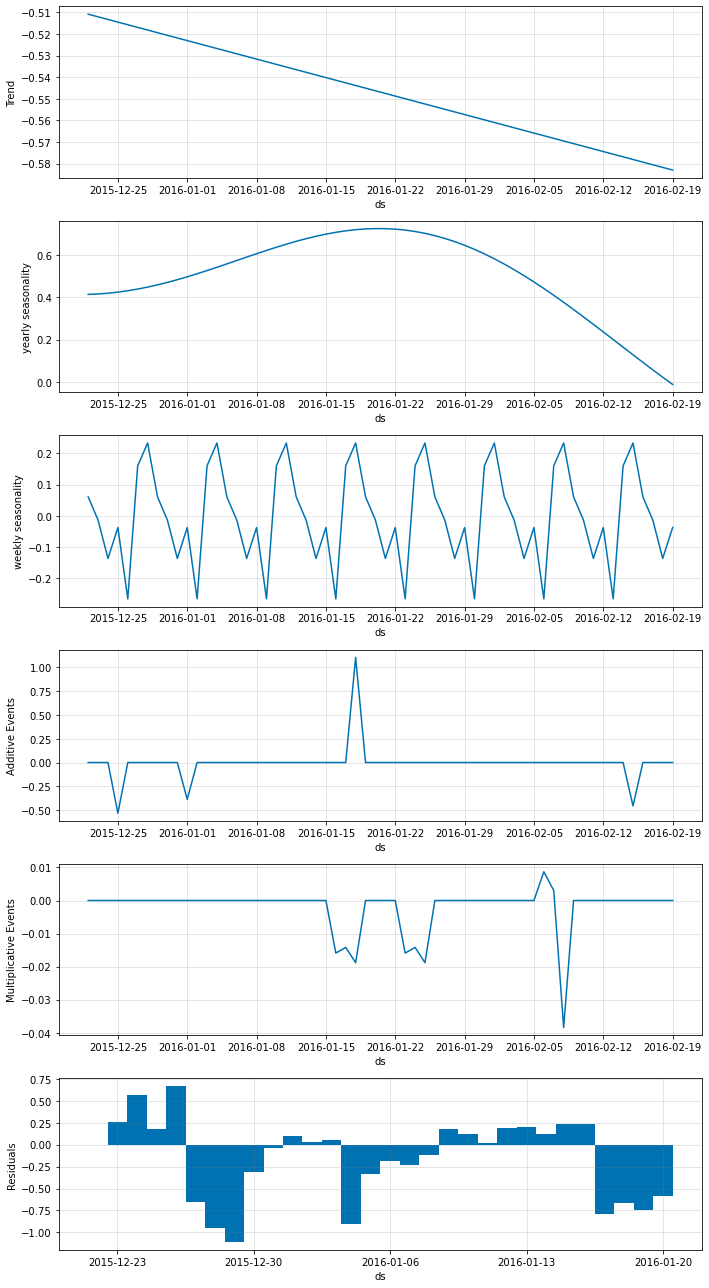

In [78]:
fig_comp = m.plot_components(forecast)

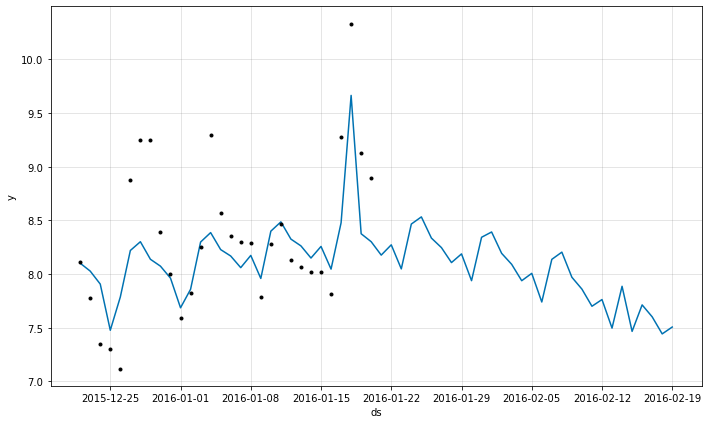

In [79]:
fig_forecast = m.plot(forecast)

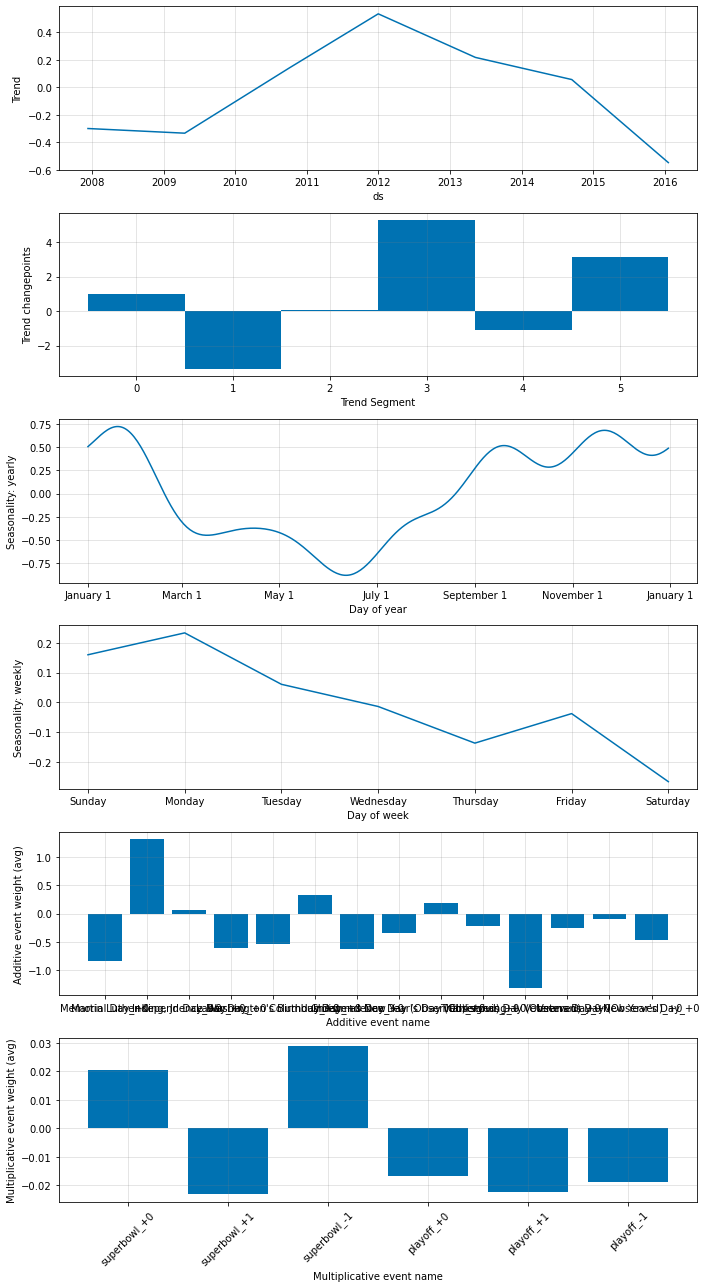

In [80]:
fig_param = m.plot_parameters()

In [81]:
m = NeuralProphet(
    n_forecasts=30,
    n_lags=60,
    ar_sparsity=0.1,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)

In [82]:
df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')
df['A'] = df['y'].rolling(7, min_periods=1).mean()
df['B'] = df['y'].rolling(60, min_periods=1).mean()
m = m.add_covariate(name='A')
m = m.add_regressor(name='B')

In [83]:
metrics = m.fit(df)
future = m.make_future_dataframe(df, n_historic_predictions=30)
forecast = m.predict(future)

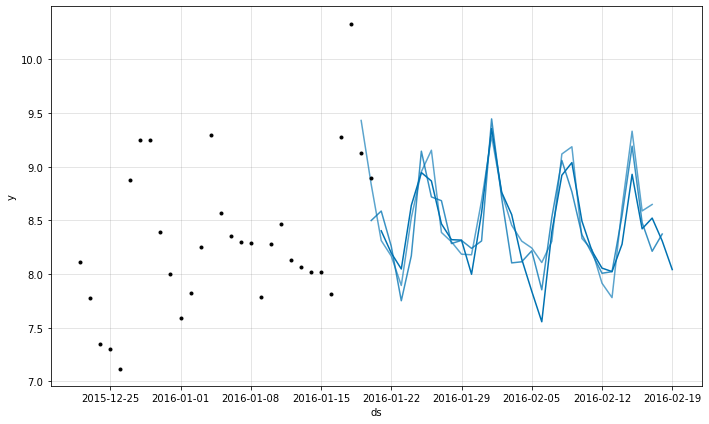

In [84]:
fig_prediction = m.plot_last_forecast(forecast[60:], include_previous_forecasts=2)

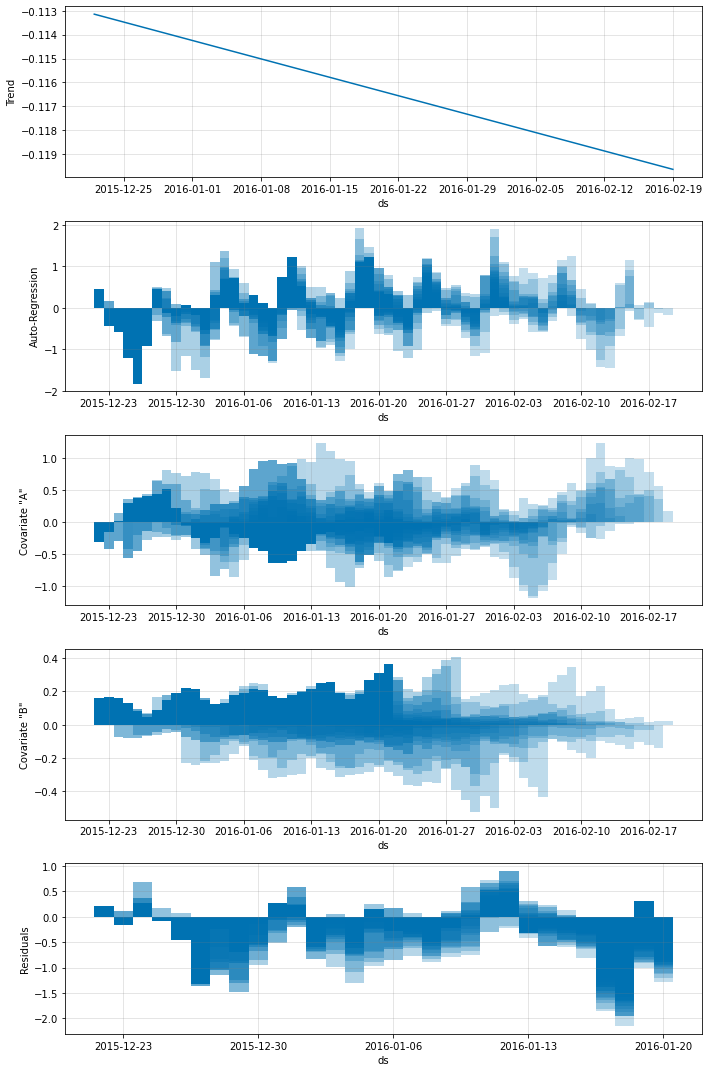

In [85]:
fig_comp = m.plot_components(forecast[60:])

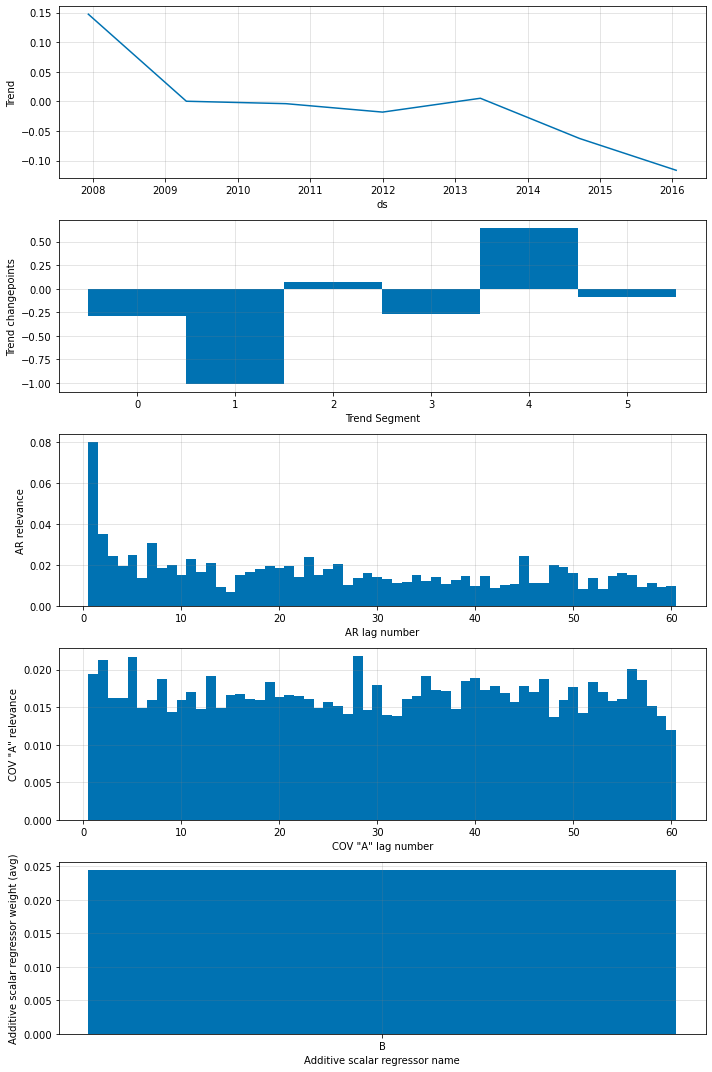

In [86]:
fig_param = m.plot_parameters()

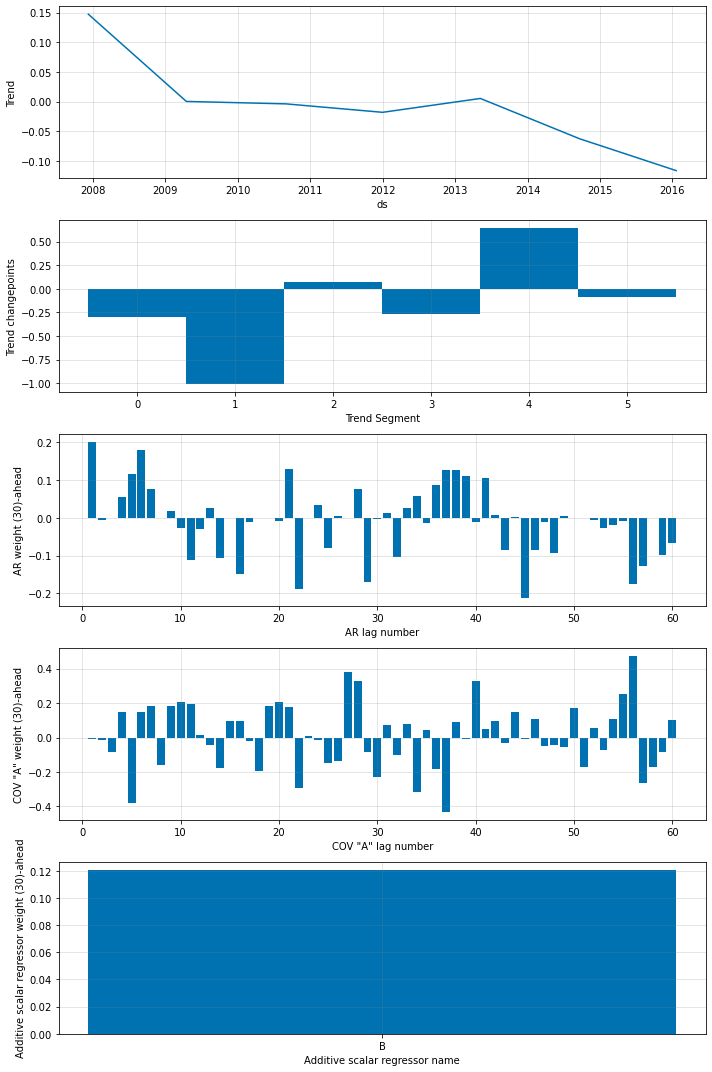

In [87]:
fig_param30 = m.highlight_nth_step_ahead_of_each_forecast(30).plot_parameters()